In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_w(ins, outs):
  res = np.zeros((64, 64))
  for i, v in enumerate(ins):
    res += np.matmul(v.flatten()[np.newaxis].T ,outs[i].flatten().reshape(1, -1))
  return res

In [3]:
def sign(inp):
  res = []

  for i in inp[0]:
    if i >= 0:
      res.append(1)
    else:
      res.append(-1)

  return np.array(res)

In [4]:
def add_noise(inp, p):
  ids = np.random.choice(len(inp[0]), int(len(inp[0])*p)+1)
  inp_c = inp.copy()
  for i in ids:
    inp_c[0][i] += float((-2*inp_c[0][i])/np.abs(inp_c[0][i]))
  return inp_c

In [5]:
# add_noise(ins[0].reshape(1, -1), 0.3)

### inputs data

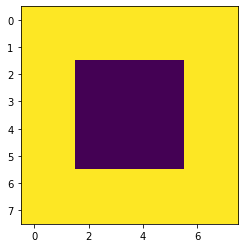

In [6]:
ins0 = [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, -1, -1, -1, -1, 1, 1],
        [1, 1, -1, -1, -1, -1, 1, 1], [1, 1, -1, -1, -1, -1, 1, 1],[1, 1, -1, -1, -1, -1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]

plt.imshow(np.array(ins0))

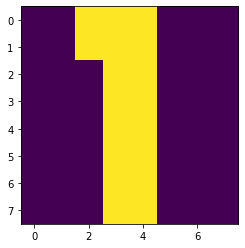

In [7]:
ins1 = [[-1, -1, 1, 1, 1, -1, -1, -1], [-1, -1, 1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, -1, -1, -1],
        [-1, -1, -1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, -1, -1, -1],[-1, -1, -1, 1, 1, -1, -1, -1],
        [-1, -1, -1, 1, 1, -1, -1, -1], [-1, -1, -1, 1, 1, -1, -1, -1]]

plt.imshow(np.array(ins1))

In [8]:
ins = [ins0, ins1]

ins = np.array(ins)

### create w matrix

In [9]:
w = gen_w(ins, ins)

np.fill_diagonal(w, 0)

### net can generate inputs from data with noise

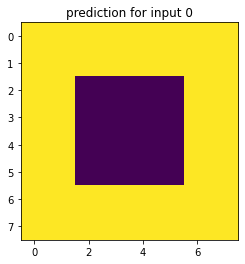

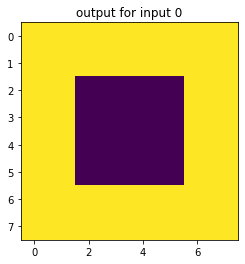

[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]
True


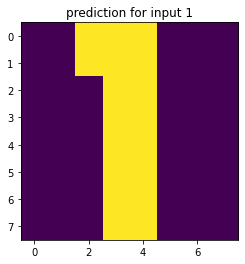

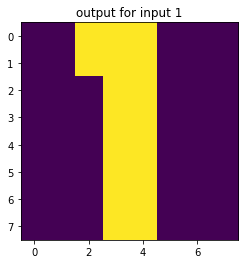

[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]
True


In [10]:
for i in range(len(ins)):
  pred = sign(np.matmul(ins[i].reshape(1,-1), w)).reshape(8, 8)
  plt.imshow(pred)
  plt.title('prediction for input '+str(i))
  plt.show()

  plt.imshow(ins[i])
  plt.title('output for input '+str(i))
  plt.show()

  print(pred == ins[i])
  print(np.all(pred == ins[i]))

### Hopfield Net

In [11]:
def convergence(y, ins):
  # print(y)
  for i in range(len(ins)):
    # print(ins[i])
    # print(np.all(y==ins[i]))
    if np.all(y==ins[i]):
      return True
  return False  

In [12]:
def act(c, i):
  if c > 0:
    return 1
  elif c == 0:
    return i
  else:
    return -1

In [13]:
def sumw(y, w, i):
  res = 0
  for j in range(len(w)):
    res += y[0][j]*w[j][i]
  return res

In [14]:
def hop_net(x, w, ins):
  rng = np.random.default_rng()
  y = x.copy()
  r = 0
  while r < 400:
    pr = rng.permutation(len(x[0]))
    for i in pr:
      y_in = x[0][i] + sumw(y, w, i)
      y[0][i] = act(y_in, y[0][i])
      
    # plt.imshow(y.reshape(8, 8))
    # print(y.reshape(8, 8))
    if convergence(y.reshape(8, 8), ins):
      return y
    r += 1

  print('conv false')
  print(x)
  for i, v in enumerate(ins):
    print('input : ', i, ' x ham-d : ', np.sum(x.reshape(8, 8) != v))
  plt.imshow(x.reshape(8,8))
  plt.show()
  return y


### pred for inputs

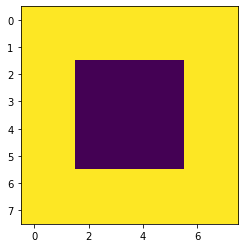

In [15]:
pred = hop_net(ins[0].reshape(1,-1), w, ins)
plt.imshow(pred.reshape(8, 8))

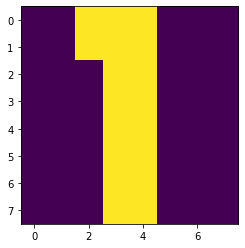

In [16]:
pred = hop_net(ins[1].reshape(1,-1), w, ins)
plt.imshow(pred.reshape(8, 8))

### pred for input with 30% noise

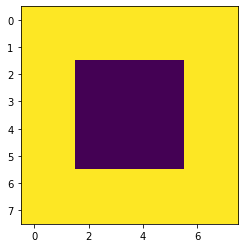

In [17]:
pred = hop_net(add_noise(ins[0].reshape(1,-1), 0.3), w, ins)
plt.imshow(pred.reshape(8, 8))

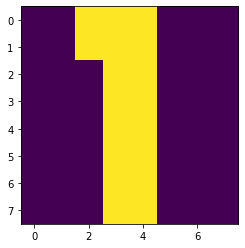

In [18]:
pred = hop_net(add_noise(ins[1].reshape(1,-1), 0.3), w, ins)
plt.imshow(pred.reshape(8, 8))

### run multiple time

In [19]:
accs = []
sh = 0
for i in range(len(ins)):
  acc = 0
  for r in range(400):
    pred = hop_net(add_noise(ins[i].reshape(1,-1), 0.2), w, ins)
    if not np.all(pred.reshape(8,8) == ins[i]):
      sh = (pred)
      plt.imshow(sh.reshape(8,8))
      plt.show()
      print('input : ', i)
      for i, v in enumerate(ins):
        print('input : ', i, ' y ham-d : ', np.sum(sh.reshape(8, 8) != v))
    acc += int(np.all(pred.reshape(8,8) == ins[i]))/400
  accs.append({'input':i, 'acc': round(acc, ndigits=4)})

for i in accs:
  print(i)

{'input': 0, 'acc': 1.0}
{'input': 1, 'acc': 1.0}
